In [1]:
import os
dataset = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith(".jpg"):
            dataset.append(os.path.join(dirname, filename))

In [2]:
len(dataset)

160

In [3]:
limited_dataset = dataset[:100]
limited_dataset

['/kaggle/input/indian-vehicle-number-plate-yolo-annotation/vid-1/frame-5.jpg',
 '/kaggle/input/indian-vehicle-number-plate-yolo-annotation/vid-1/frame-2015.jpg',
 '/kaggle/input/indian-vehicle-number-plate-yolo-annotation/vid-1/frame-315.jpg',
 '/kaggle/input/indian-vehicle-number-plate-yolo-annotation/vid-1/frame-2300.jpg',
 '/kaggle/input/indian-vehicle-number-plate-yolo-annotation/vid-1/frame-3505.jpg',
 '/kaggle/input/indian-vehicle-number-plate-yolo-annotation/vid-1/frame-305.jpg',
 '/kaggle/input/indian-vehicle-number-plate-yolo-annotation/vid-1/frame-1235.jpg',
 '/kaggle/input/indian-vehicle-number-plate-yolo-annotation/vid-1/frame-3490.jpg',
 '/kaggle/input/indian-vehicle-number-plate-yolo-annotation/vid-1/frame-2280.jpg',
 '/kaggle/input/indian-vehicle-number-plate-yolo-annotation/vid-1/frame-270.jpg',
 '/kaggle/input/indian-vehicle-number-plate-yolo-annotation/vid-1/frame-25.jpg',
 '/kaggle/input/indian-vehicle-number-plate-yolo-annotation/vid-1/frame-3510.jpg',
 '/kaggle/in

In [4]:
HOME = os.getcwd()

In [5]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

/kaggle/working
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 421, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 421 (delta 138), reused 132 (delta 125), pack-reused 237
Receiving objects: 100% (421/421), 12.85 MiB | 12.92 MiB/s, done.
Resolving deltas: 100% (215/215), done.
/kaggle/working/GroundingDINO
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.0.10 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you 

In [6]:
CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/kaggle/working/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [7]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/kaggle/working
/kaggle/working/weights


In [8]:
WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/kaggle/working/weights/groundingdino_swint_ogc.pth ; exist: True


In [9]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/kaggle/working/GroundingDINO


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/modeling_utils.py:942: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


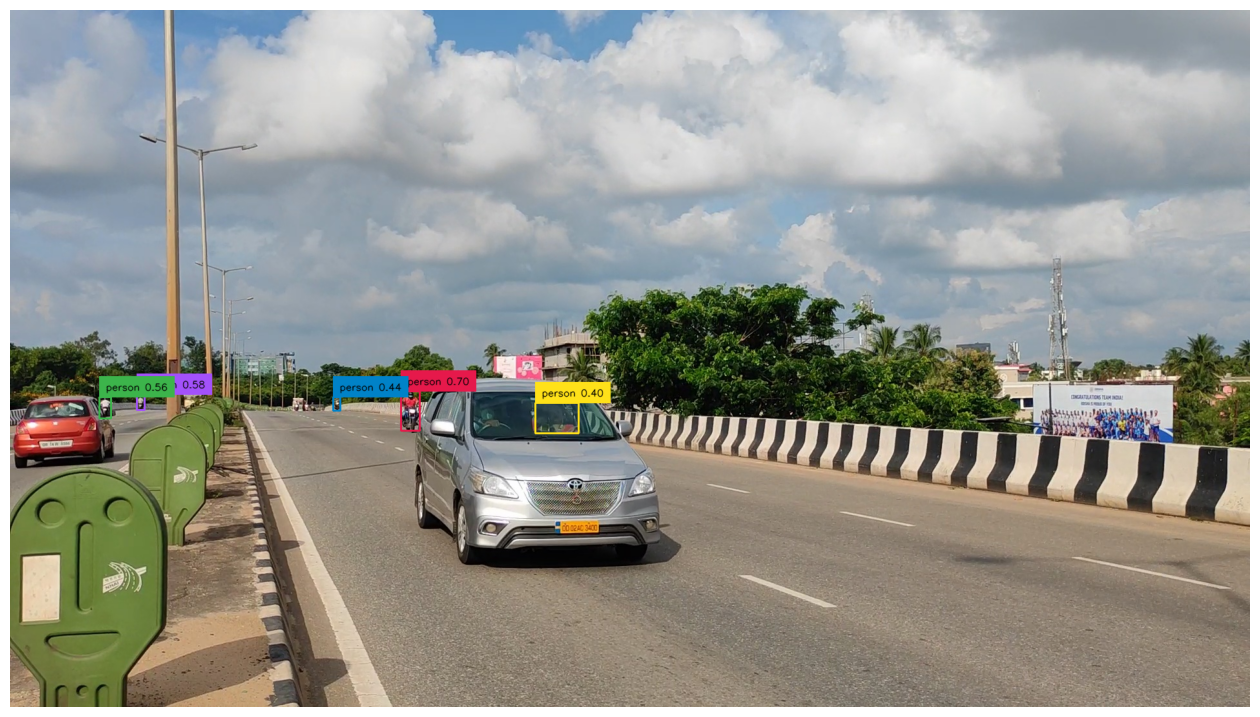

In [10]:
import supervision as sv

TEXT_PROMPT = "person"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(limited_dataset[4])

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  
sv.plot_image(annotated_frame, (16, 16))

In [11]:
TEXT_PROMPT = "license plate"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

def predict_boxes(image):
    image_source, image = load_image(limited_dataset[4])

    boxes, logits, phrases = predict(
        model=model, 
        image=image, 
        caption=TEXT_PROMPT, 
        box_threshold=BOX_TRESHOLD, 
        text_threshold=TEXT_TRESHOLD
    )

    return boxes

In [12]:
import timeit

start = timeit.default_timer()

for file in dataset:
    predict_boxes(file)

stop = timeit.default_timer()

print('Time: ', stop - start)  

/opt/conda/lib/python3.10/site-packages/transformers/modeling_utils.py:942: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


Time:  46.46666112900016
